In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Social_Network_Ads (2).csv to Social_Network_Ads (2).csv


In [3]:
df = pd.read_csv('Social_Network_Ads (2).csv')

In [4]:
X= df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_model = DecisionTreeClassifier(max_depth=1)
classifier = AdaBoostClassifier(estimator=base_model, n_estimators=50, random_state=42,learning_rate = 1.0)
classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.9


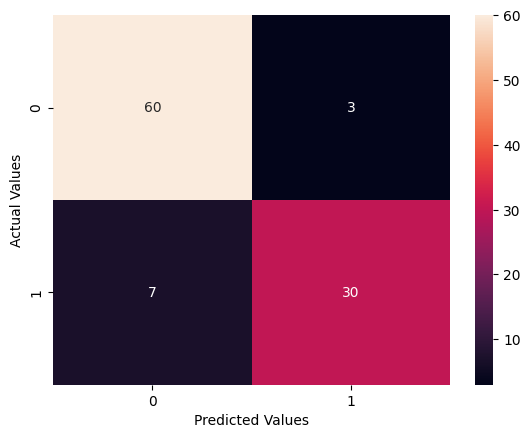

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_grad = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
classifier_grad.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [21]:
y_pred = classifier_grad.predict(X_test)

In [22]:
print("Accuracy: ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.88
[[58  5]
 [ 7 30]]


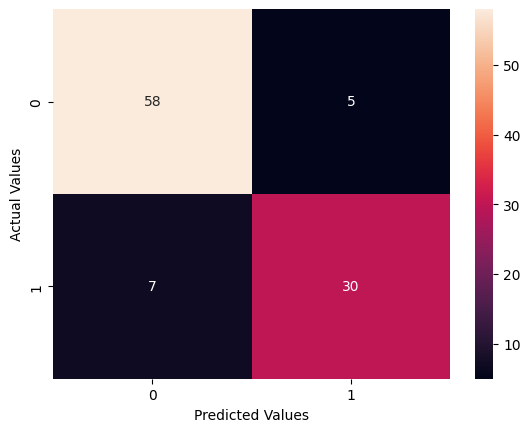

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [24]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(n_estimators=100,
                               learning_rate=1.0,
                               max_depth=1,
                               random_state=42,

                               )
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [27]:
y_pred = classifier_xgb.predict(X_test)

In [28]:
print("Accuracy: ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.88
[[59  4]
 [ 8 29]]


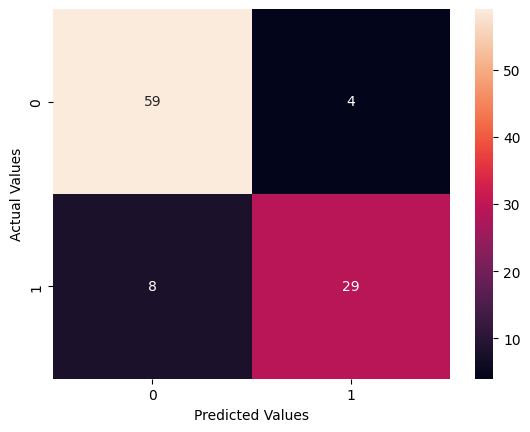

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Task: Telco Customer Churn

In [30]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [53]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score


from xgboost import XGBClassifier
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
df[['tenure', 'MonthlyCharges', 'Contract', 'PaymentMethod']].head()

,tenure,MonthlyCharges,Contract,PaymentMethod
0,1,29.85,Month-to-month,Electronic check
1,34,56.95,One year,Mailed check
2,2,53.85,Month-to-month,Mailed check
3,45,42.30,One year,Bank transfer (automatic)
4,2,70.70,Month-to-month,Electronic check


In [55]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [56]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()


le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
  df[col] = le.fit_transform(df[col])


X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42, stratify=y
)

In [57]:
xgb_base = XGBClassifier(
n_estimators=100,
max_depth=4,
learning_rate=0.1,
subsample=0.8,
colsample_bytree=0.8,
eval_metric='logloss',
random_state=42
)


xgb_base.fit(X_train, y_train)


y_pred = xgb_base.predict(X_test)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')

Accuracy: 0.79806598407281
Recall: 0.5310492505353319


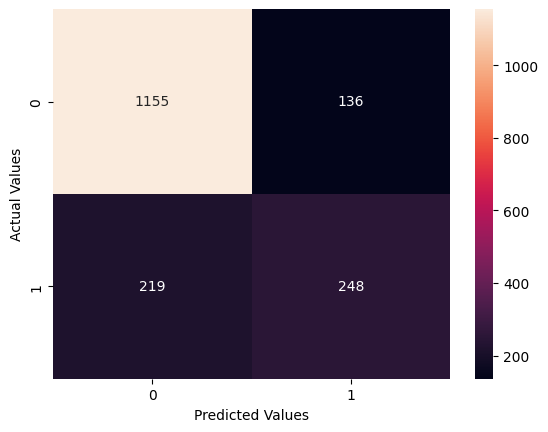

In [65]:
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [70]:
true_positive = cm[1,1]
false_positive = cm[0,1]


true_positive, false_positive

(np.int64(248), np.int64(136))

<Axes: xlabel='Importance', ylabel='Feature'>

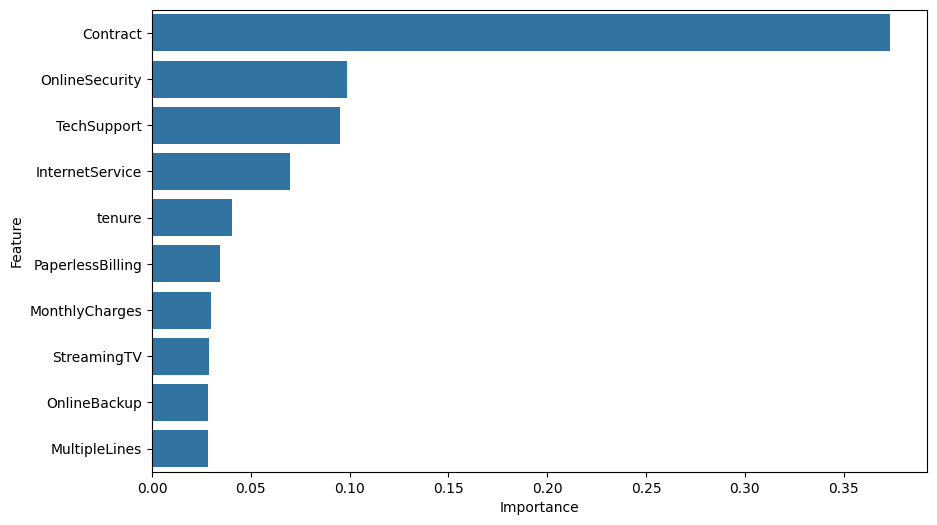

In [72]:
import matplotlib.pyplot as plt


importance = xgb_base.feature_importances_
features = X.columns


fi = pd.DataFrame({'Feature': features, 'Importance': importance})
fi.sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi.sort_values(by='Importance', ascending=False).head(10))

Business Interpretation
Top churn drivers usually include:
- Contract type
- Tenure
- MonthlyCharges
- PaymentMethod